## <center> ВИЗУАЛИЗАЦИЯ ДАННЫХ. ЗАДАНИЕ ДЛЯ ЗАКРЕПЛЕНИЯ

In [6]:
# импорт библиотек и чтение файла с информацией
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('default')
churn_data = pd.read_csv('churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <center> Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
active_client=churn_data['Exited'].value_counts() #считаем количество лояльных и ушедших клиентов

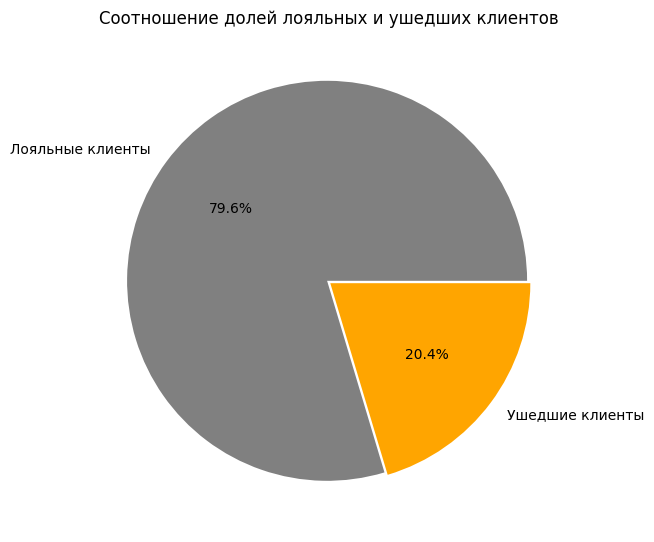

In [7]:
fig=plt.figure(figsize=(5, 5))
axes=fig.add_axes([0, 0, 1, 1])
axes.pie(
    active_client,
    explode = (0.01, 0.01),
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    colors=['grey', 'orange']
    );
axes.set_title('Соотношение долей лояльных и ушедших клиентов');

Вывод по графику: доля лояльных клиентов значительно превышает долю ушедших клиентов.

## <center> Задание 9.2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [47]:
churn_data_balance=churn_data[churn_data['Balance']>=2500] #выделяем клиентов, баланс которых превышает 2500 долларов

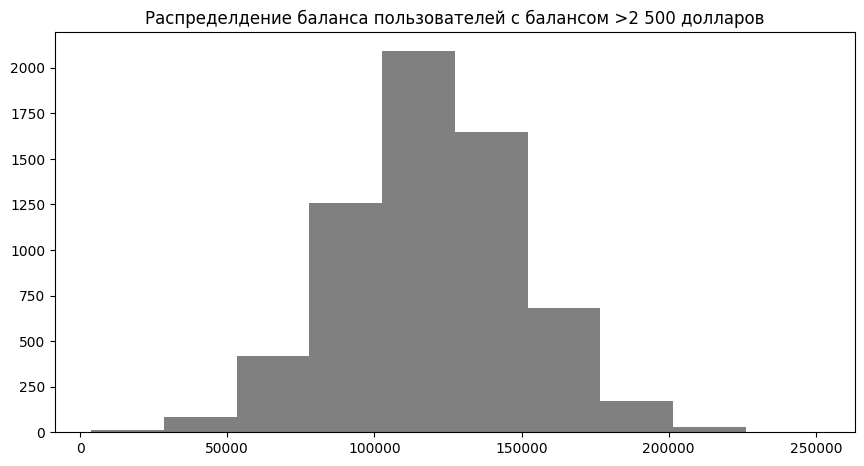

In [48]:
fig=plt.figure(figsize=(8, 4))
axes=fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=churn_data_balance['Balance'],
    label=['Баланс'],
    color='grey',
    bins=10
);
axes.set_title('Распределдение баланса пользователей с балансом >2 500 долларов');

Выводы по графику: большая часть клиентов банка имеет на балансе от примерно 100 до 140 тысяч долларов. Небольшое количество клиентов (менее 250 человек) имеют на балансе менее 50 тысяч долларов и баланс более 200 тысяч долларов.

## <center> Задание 9.3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [49]:
churn_data['ExitedClient']=churn_data['Exited'].apply(lambda x: 'Loyal' if x==0 else 'Exited') #дополительный столбец с обозначением лояльных и ушедших клиентов (для легенды)

In [50]:
fig=px.box(
    data_frame=churn_data,
    x="Balance",
    color='ExitedClient',
    height=500,
    width=700,
    color_discrete_map={'Exited': 'Orange', 'Loyal': 'DimGray'},
    title='Pаспределение баланса клиента в разрезе признака оттока',
);
fig.show()

Выводы по графику: медианный баланс в обоих групп клиентов отличается не значительно (126 тысяч долларов для лояльных клиентов и 131 тысяча долларов для ушедших). Половина балансов лояльных клиентов находится в диапазоне от 0 до 126 тысяч долларов. 

Возможно ушедших не устраивалb невыгодный условия депозитов (например, низкий процент на остаток, невыгодные сроки депозитов, приносящие меньше профита, чем хотелось бы).

## <center> Задание 9.4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [51]:
fig=px.box(
    data_frame=churn_data,
    x="Age",
    color='ExitedClient',
    height=500,
    width=700,
    color_discrete_map={'Exited': 'Orange', 'Loyal': 'DimGray'},
    title='Pаспределение возраста клиента в разрезе признака оттока',
);
fig.show()

Выводы по графику: по графику мы можем видеть, что в целом основной пул клиентов банка (лояньных и ушедших) находится в промежутке от 31 до 51 года, для лояльных клиентов разброс  меньше - 31-41 год.

Большое количество выбросов среди лояньных клиентом мы видим в пенсионном возрасте (от 57 лет). Таких клиентов не много, но достаточно, чтобы обратить внимание и рассмотреть эту группу отдельно. Возможно, для этих клиентов условия депозитария являются приклекательным, но недостаточно привлекательными, чтобы таких клиентов было больше. Кроме того, клиенты возраста 57-70 лет входят в "усы коробки", поэтому обратить на них внимание необходимо, чтобы они не пополнили ряды ушедших клиентов. Для привлечения денег от пожилого населения банку нужно подумать над особыми условиями для пенсионеров, запустить рекламную кампанию.

Также четверть покинувших банк клиентов - те, кто находится в основной группе лояльных клиентов и могут уйти в другой банк в любой момент. На клиентов в возрасте от 38 до 41 также стоит обратить внимание, например, ознакомить их с различными вариантами вкладов (депозиты, ценные бумаги, валюты, металлы).

## <center> Задание 9.5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

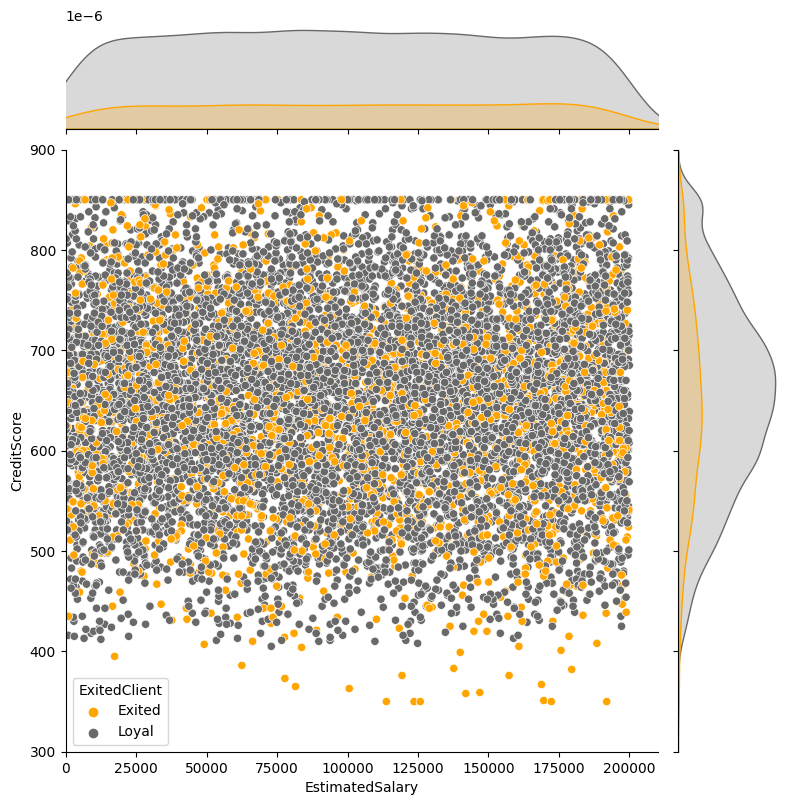

In [52]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='ExitedClient',
    xlim = (0, 210000),
    ylim = (300, 900),
    height=8,
    palette={'Exited': 'Orange', 'Loyal': 'DimGray'}
);

Выводы по графику: взаимосвязь между рейтингом клиента и его предполагемой заработной платой не наблюдается. Можно заметить, что у ушедших клиентов присутствует кредитный рейтинг ниже 400, в то время как у лояльных клиентов такого не наблюдается. Также мы видим, что максимальный рейтинг для обоих групп - около 850 (вероятно, это максимальный рейтинг для данного банка).

## <center> Задание 9.6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [53]:
exited_clients_gender=churn_data[churn_data['Exited']==1]['Gender'].value_counts() #посчитаем количество ушедших клиентов в разрезе пола

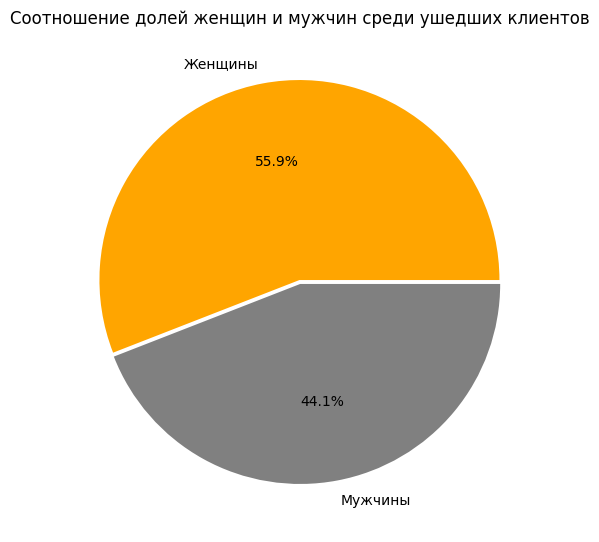

In [54]:
fig=plt.figure(figsize=(5, 5))
axes=fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_clients_gender,
    explode = (0.01, 0.01),
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%',
    colors=['orange','grey']
    );
axes.set_title('Соотношение долей женщин и мужчин среди ушедших клиентов');

Выводы по графику: чаще банк покидают женщины.

## <center> Задание 9.7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [55]:
churn_data_services=churn_data.groupby(['NumOfProducts', 'ExitedClient'], as_index=False).count() #группируем данные по признаку оттока и считаем количество 

In [113]:
barplot=px.bar(
    data_frame=churn_data_services,
    x='NumOfProducts',
    y='CustomerId',
    color='ExitedClient',
    barmode='group',
    width=700,
    height=400,
    title='Соотношением ушедших и лояльных клиентов в развере количества услуг',
);
fig.show()

In [122]:
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    barmode='group',
    height=300,
    width=700,
    title='Соотношение ушедших и лольяных клиентов в зависимости от числа услуг',
    color_continuous_scale='Greys'
);
fig.show()

Выводы по графику: количество ушедших клиентов имеет обратную зависимость от количества полученных клиентами услуг (т.е. чем меньше услуг клиент получил, тем больше количество клиентов, покинувших банк).

## <center> Задание 9.8
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [8]:
churn_data_active=churn_data[churn_data['Exited']==1].groupby(['IsActiveMember'], as_index=False)[['Exited']].count() #группируем ушедших клиентов по признаку активности

In [111]:
fig=px.histogram(
    data_frame=churn_data_active,
    x='IsActiveMember',
    y='Exited',
    color='IsActiveMember',
    height=300,
    width=700,
    title='Отток клиентов в разрезе их статуса',
    color_discrete_map={0: 'Orange', 1: 'DimGray'}
);
fig.update_layout(yaxis_title="Количество клиентов")
fig.update_xaxes(type='category')
fig.show()

Выводы по графику: по графику мы видим, что основная часть ушедших клиентов не имела активного статуса. Для того, чтобы уменьшить отток неактивных клиентов банку следуют предпринять усилия, чтобы перевести неактивныхъ клиентов в статус активных: информировать о выгодных предложениях банка (выгодные проценты по дипозитам, инветиционные программы и прочее). Как правило банки звонят с предложением кредитования (хотя в случае, если клиенту нужен кредит, он сам найдет лучшие условия), в то время как выгодных предложений, где проценты платят клиенту, а не клиент, неактивным клиентам не поступают.

## <center> Задание 9.9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [109]:
choropleth=churn_data.groupby('Geography', as_index=False)[['Exited']].mean()

In [63]:
fig = px.choropleth(
    data_frame=choropleth,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0.1, 0.5],
    title='Отток клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Oranges'
)

fig.show()

Выводы по графику: самое большое количество ушедших клиентов сосредоточено в Германии и примерно в два раза превосходит количество ушедших клиентов во Франции и Испании. Это может быть связано, например, с бОльшим количеством альтернативных банков с выгодными условиями; также это может быть вызвано недостаточной хорошо выстроенной работой с клиентами (информирование, горячие/холодные звонки, отсутствие работы с неактивными клиентами).

## <center> Задание 9.10
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [64]:
#функция, данная в задании
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat) #применение функции get_credit_score_cat

In [108]:
#пивот по категориям рейтингов
pivot=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

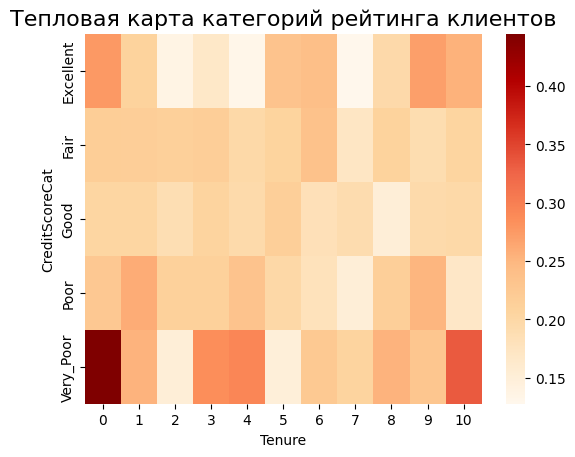

In [66]:
heatmap = sns.heatmap(data=pivot, cmap='OrRd')
heatmap.set_title('Тепловая карта категорий рейтинга клиентов', fontsize=16);

Выводы по графику: по тепловой карте мы видим, что чаще всего уходят клиенты с низким рейтингом с менее чем одним годом пользования услугами банка. Вторыми по частоте уходят клиенты с низким рейтингом и пользовавшиеся услугами банка 10 лет.